In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
import pandas as pd


iris = datasets.load_iris()

In [18]:
%matplotlib inline

In [19]:
iris = pd.read_csv('iris.csv')
iris=iris.drop(columns='Unnamed: 0')
iris.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model=KNeighborsClassifier(n_neighbors=5,metric='manhattan')

In [22]:
X=iris.iloc[:,:4]
y=iris.iloc[:,-1]
model.fit(X,y)


KNeighborsClassifier(metric='manhattan')

In [23]:
sample = np.array([4.5, 3.2, 1.6, 0.5])
model.predict([sample]) 

c:\Users\hirsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [24]:
model.score(X, y)

0.9666666666666667

### KNN FROM SCRATCH

In [25]:
import statistics as st

In [26]:
class KNN:
    def __init__(self, n_neighbours = 5, metric = 'euclidean',weights=False):
        self.k=n_neighbours
        self.metric=metric
        self.weights=weights

        
    def fit(self,X_tr,y_tr):
        self.x = X_tr
        self.y = y_tr
    
    def predict(self,X_test):       
        if self.metric=='euclidean':
            p=2
        elif self.metric=='manhattan':
            p=1
        
        distance=pd.Series((np.sum(np.abs(self.x.values-X_test)**p,axis=1))**(1/p))
        distance=distance.sort_values()
        k_nearest_neighbours_distance = distance.iloc[:self.k]
        indices = distance.iloc[:self.k].index
        
        k_nearest_neighbours_distance = pd.DataFrame(distance.iloc[:self.k])
        k_nearest_neighbours = pd.DataFrame(self.y[indices],index=indices)


        k_nearest_neighbours=k_nearest_neighbours.join(k_nearest_neighbours_distance)

        k_nearest_neighbours=k_nearest_neighbours.rename(columns={0:'Values'})

        if self.weights==True:
            k_nearest_neighbours['Values']=k_nearest_neighbours['Values'].apply(lambda x:1/(x+1))
            k_nearest_neighbours=k_nearest_neighbours.groupby('class',as_index=False).agg({'Values':'sum'})
            print(k_nearest_neighbours)
            
            return k_nearest_neighbours.idxmax()                     
        return st.mode(k_nearest_neighbours['class'])
            
        
    def score(self,x_test, y_actual):
        score=0
        for x,y_act in zip(x_test,y_actual):
            y_pred=self.predict(x)
            if y_pred==y_act:
                score+=1
        acc=(100*score)/len(y_actual)
        return acc
    
    def best_k(self,df,l=1,r=10):
        score_sample=df.sample(100)
        
        acc=dict()
        for i in range(l,r):
            self.k=i
            acc[i]=self.score(score_sample.iloc[:,:-1].values,score_sample.iloc[:,-1].values)
        
        d=pd.Series(acc,index=list(acc.keys()))
        
        
        ax=sns.lineplot(x=d.index,y=d.values,data=d)
        ax.set(xlabel='K-values',ylabel='Accuracy')
        
        

In [27]:
model=KNN(5,'euclidean')
model.fit(X,y)
sample=iris.sample(1)
print(sample)
model.predict(sample.values[0][:-1])

    sepal_lenght  sepal_width  petal_lenght  petal_width        class
47           4.6          3.2           1.4          0.2  Iris-setosa


'Iris-setosa'

In [33]:
score_sample=iris.sample(10)

score=model.score(score_sample.iloc[:,:-1].values,score_sample.iloc[:,-1].values)
print(score)

100.0


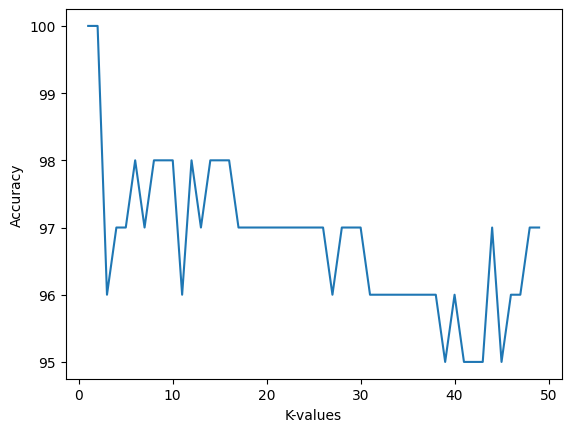

In [32]:
model.best_k(iris,1,50)